In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

In [54]:
from google.colab import files
uploaded = files.upload()

Saving book.csv to book (1).csv


In [55]:
raw_data = pd.read_csv('book.csv')
raw_data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


#Descriptive Statistics

In [56]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [57]:
raw_data.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
raw_data.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [59]:
raw_data[raw_data.duplicated()].sum()

ChildBks     650
YouthBks     351
CookBks      644
DoItYBks     407
RefBks       267
ArtBks       304
GeogBks      385
ItalCook     120
ItalAtlas     23
ItalArt       36
Florence     115
dtype: int64

#Data Visualization

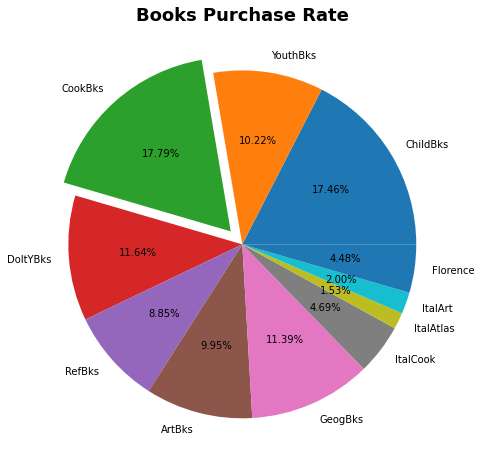

In [60]:
plt.figure(figsize = (12,8))
plt.pie(raw_data.sum(),
       labels=raw_data.columns,
       explode = [0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%')
plt.title("Books Purchase Rate", fontsize = 18, fontweight = 'bold')
plt.show()

In [61]:
# Top Most Frequent Bought Books
count = pd.DataFrame(raw_data.sum())
count.columns = ['Count']
count

,Count
ChildBks,846
YouthBks,495
CookBks,862
DoItYBks,564
RefBks,429
ArtBks,482
GeogBks,552
ItalCook,227
ItalAtlas,74
ItalArt,97


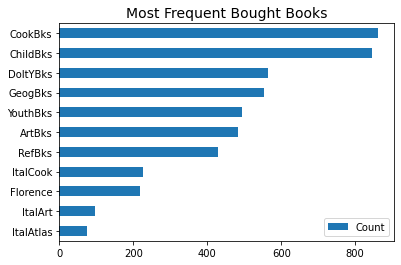

In [62]:
count.sort_values('Count',inplace=True)
count.plot(kind='barh')
plt.title('Most Frequent Bought Books',fontsize=14)
plt.show()

In [63]:
first = pd.DataFrame(raw_data.mean(), columns = ["Support"]).sort_values("Support", ascending = False)
first

,Support
CookBks,0.4310
ChildBks,0.4230
DoItYBks,0.2820
GeogBks,0.2760
YouthBks,0.2475
ArtBks,0.2410
RefBks,0.2145
ItalCook,0.1135
Florence,0.1085
ItalArt,0.0485


#Association Rules

**Apriori Algorithm for 10% Support and 30% confidence**

In [64]:
data = raw_data.copy()
items = apriori(data,min_support=0.1,use_colnames=True)
items['length'] = items['itemsets'].apply(lambda x: len(x))
items

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(YouthBks, ChildBks)",2


In [65]:
rules = association_rules(items,metric='confidence',min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
84,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
85,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
86,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
87,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


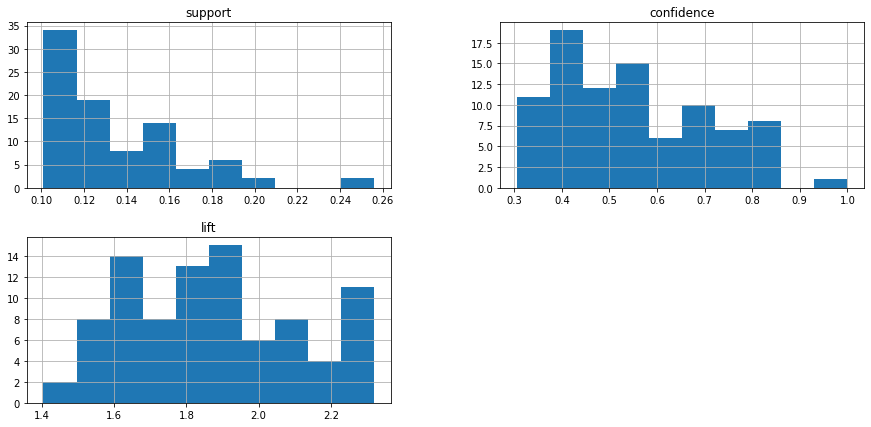

In [66]:
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

In [67]:
# Lift Ratio > 1 is a good influential rule
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
84,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
85,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
86,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
87,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


#Visualization

Support vs Confidence

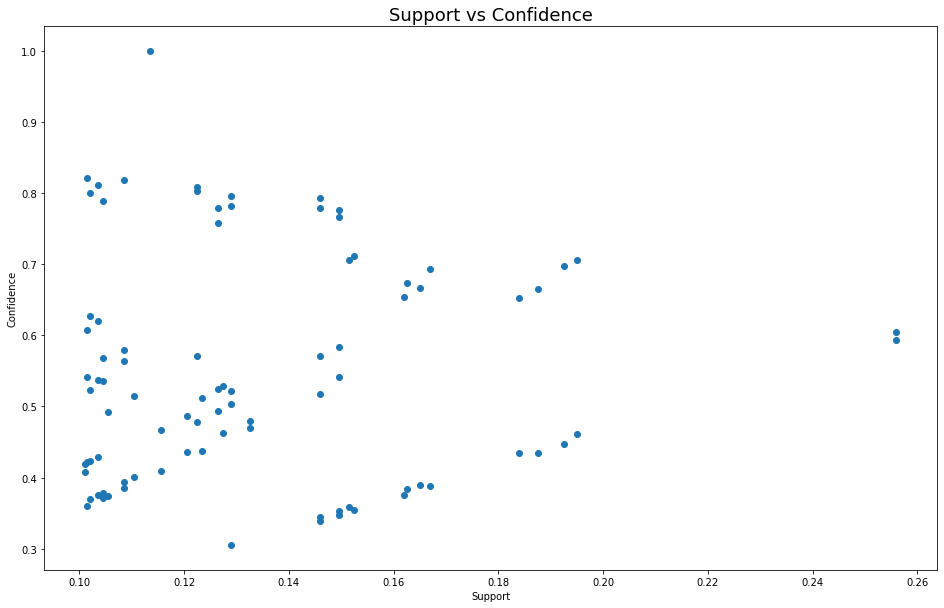

In [68]:
plt.figure(figsize=(16,10))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence') 
plt.title('Support vs Confidence', fontsize=18)
plt.show()

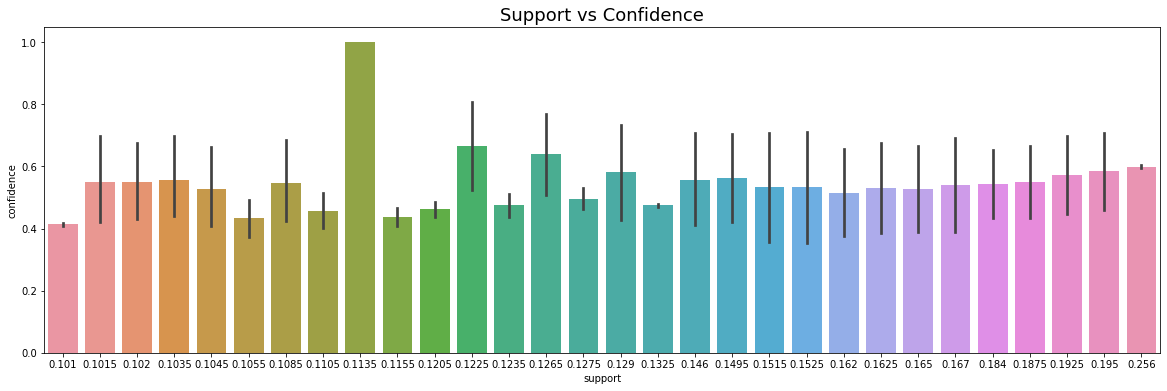

In [69]:
plt.figure(figsize=(20,6))
sns.barplot("support","confidence",data=lift)
plt.title("Support vs Confidence", fontsize=18)
plt.show()

Lift vs Confidence

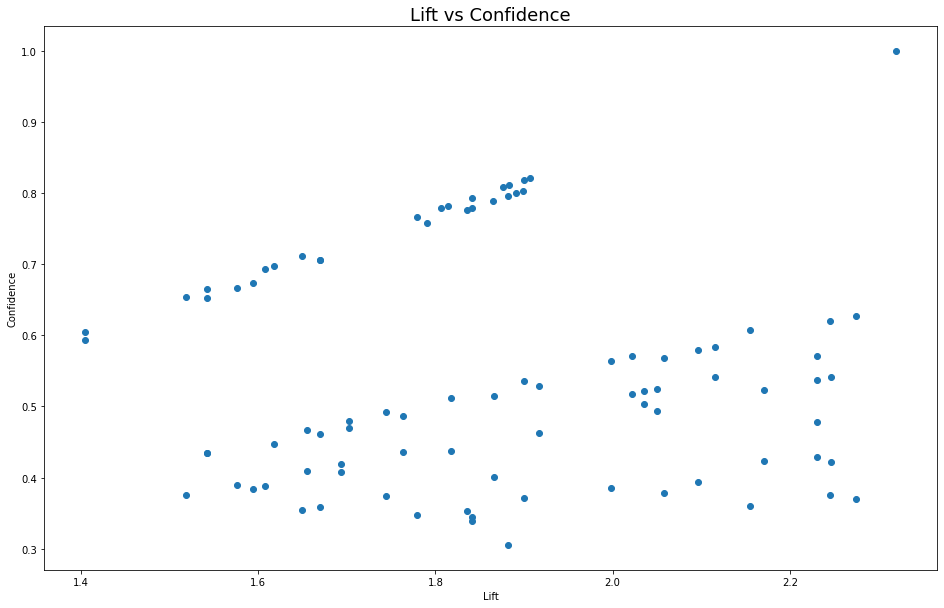

In [70]:
plt.figure(figsize=(16,10))
plt.scatter(rules['lift'],rules['confidence'])
plt.xlabel('Lift')
plt.ylabel('Confidence') 
plt.title('Lift vs Confidence', fontsize=18)
plt.show()

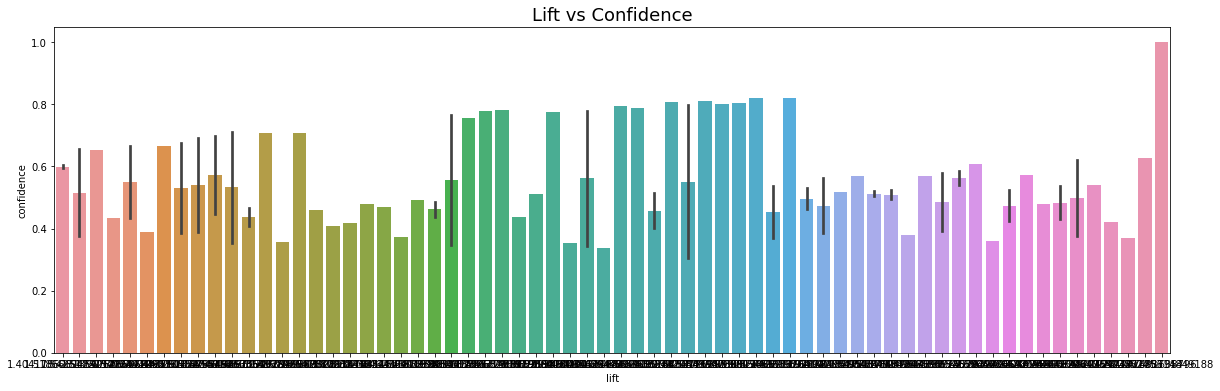

In [71]:
plt.figure(figsize=(20,6))
sns.barplot("lift","confidence",data=lift)
plt.title("Lift vs Confidence", fontsize=18)
plt.show()

Support vs Lift

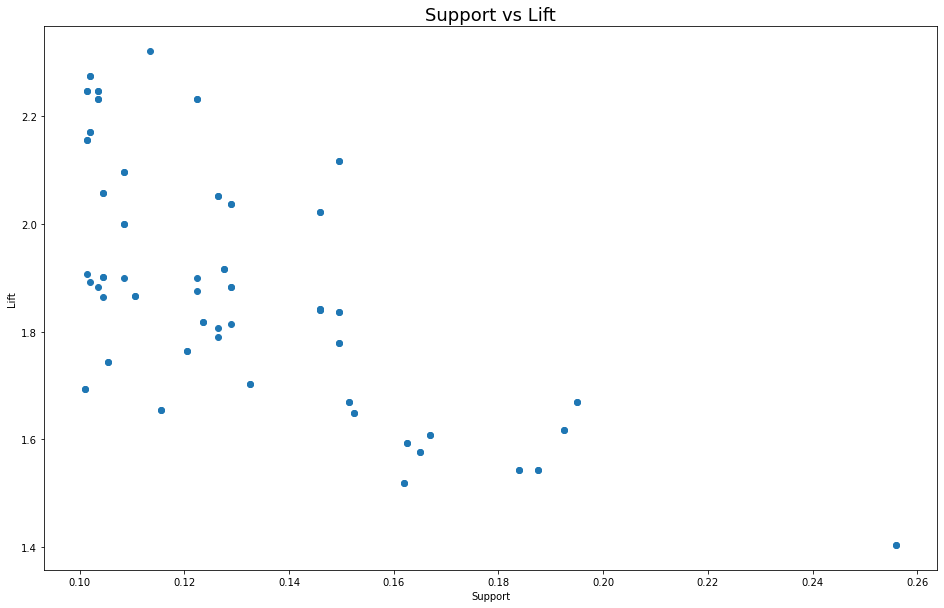

In [72]:
plt.figure(figsize=(16,10))
plt.scatter(rules['support'],rules['lift'])
plt.xlabel('Support')
plt.ylabel('Lift') 
plt.title('Support vs Lift', fontsize=18)
plt.show()

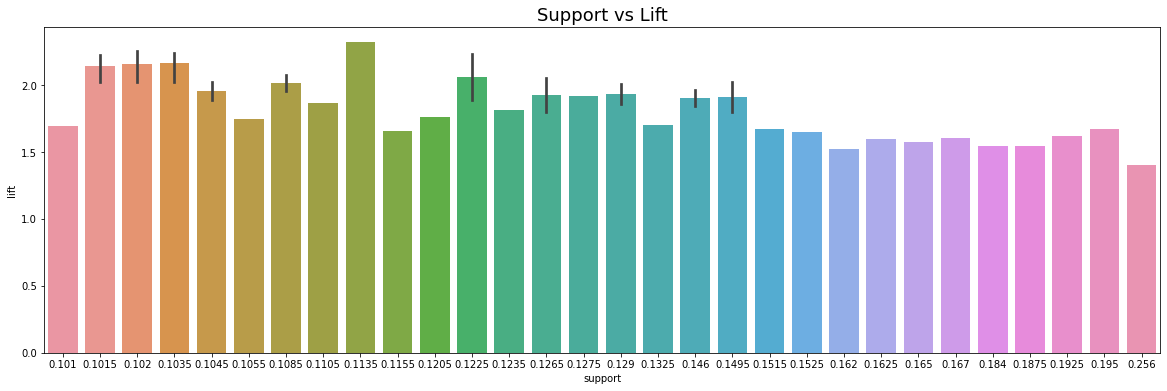

In [73]:
plt.figure(figsize=(20,6))
sns.barplot("support","lift",data=lift)
plt.title("Support vs Lift", fontsize=18)
plt.show()

**Apriori Algorithm for 15% Support and 40% confidence**

In [74]:
data = raw_data.copy()
items = apriori(data,min_support=0.15,use_colnames=True)
items['length'] = items['itemsets'].apply(lambda x: len(x))
items

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1650,"(YouthBks, ChildBks)",2
8,0.2560,"(CookBks, ChildBks)",2
9,0.1840,"(ChildBks, DoItYBks)",2


In [75]:
rules = association_rules(items,metric='confidence',min_threshold=0.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(CookBks),(ChildBks),0.4310,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
3,(ChildBks),(DoItYBks),0.4230,0.282,0.1840,0.434988,1.542511,0.064714,1.270770
4,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
5,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
6,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
7,(ChildBks),(GeogBks),0.4230,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
8,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
9,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105


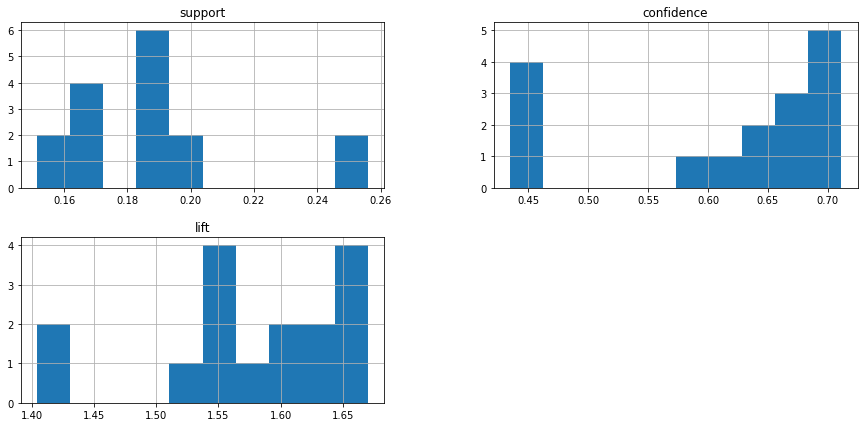

In [76]:
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

In [77]:
# Lift Ratio > 1 is a good influential rule
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(CookBks),(ChildBks),0.4310,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
3,(ChildBks),(DoItYBks),0.4230,0.282,0.1840,0.434988,1.542511,0.064714,1.270770
4,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
5,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
6,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
7,(ChildBks),(GeogBks),0.4230,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
8,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
9,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105


Support vs Confidence

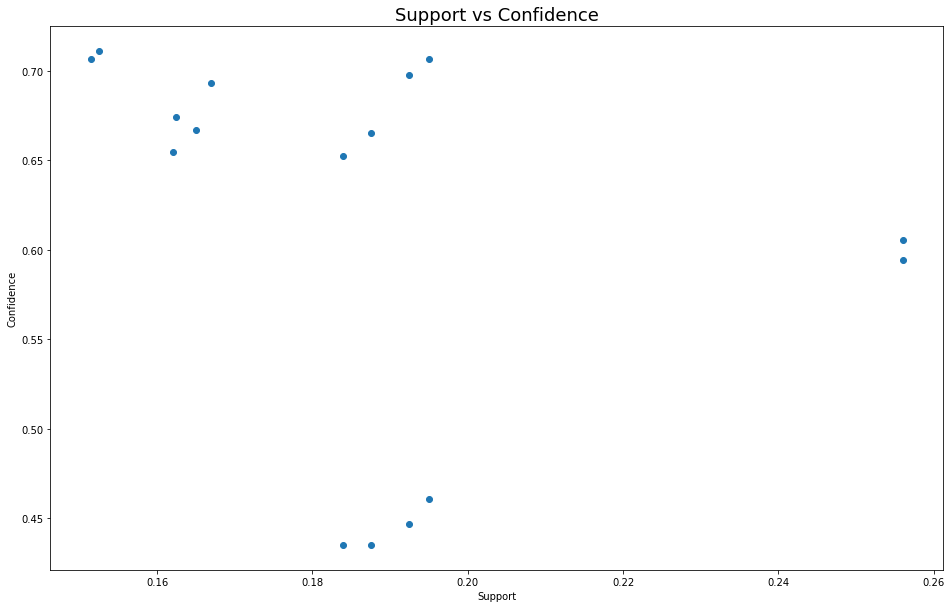

In [78]:
plt.figure(figsize=(16,10))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence') 
plt.title('Support vs Confidence', fontsize=18)
plt.show()

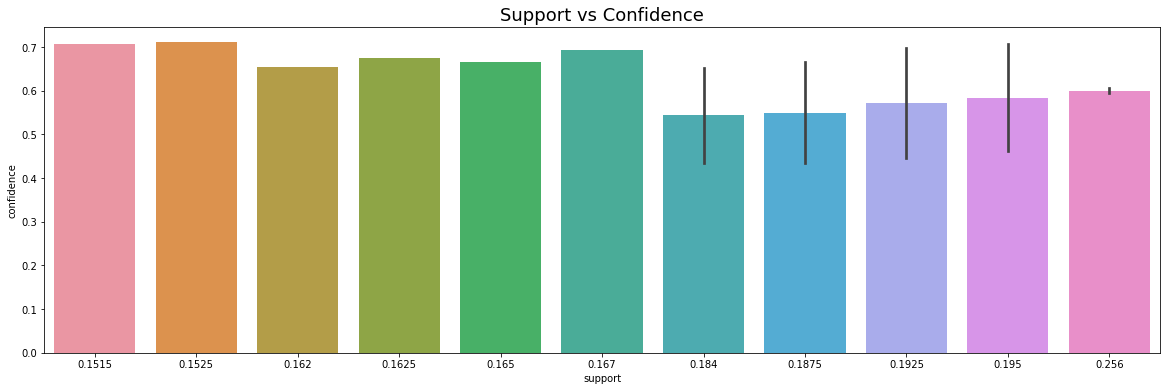

In [79]:
plt.figure(figsize=(20,6))
sns.barplot("support","confidence",data=lift)
plt.title("Support vs Confidence", fontsize=18)
plt.show()

Lift vs Confidence

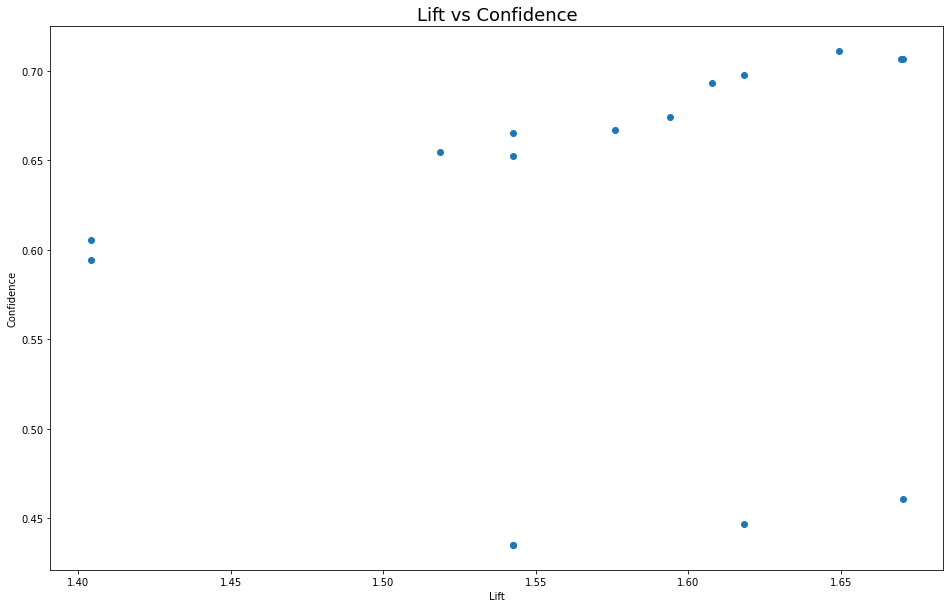

In [80]:
plt.figure(figsize=(16,10))
plt.scatter(rules['lift'],rules['confidence'])
plt.xlabel('Lift')
plt.ylabel('Confidence') 
plt.title('Lift vs Confidence', fontsize=18)
plt.show()

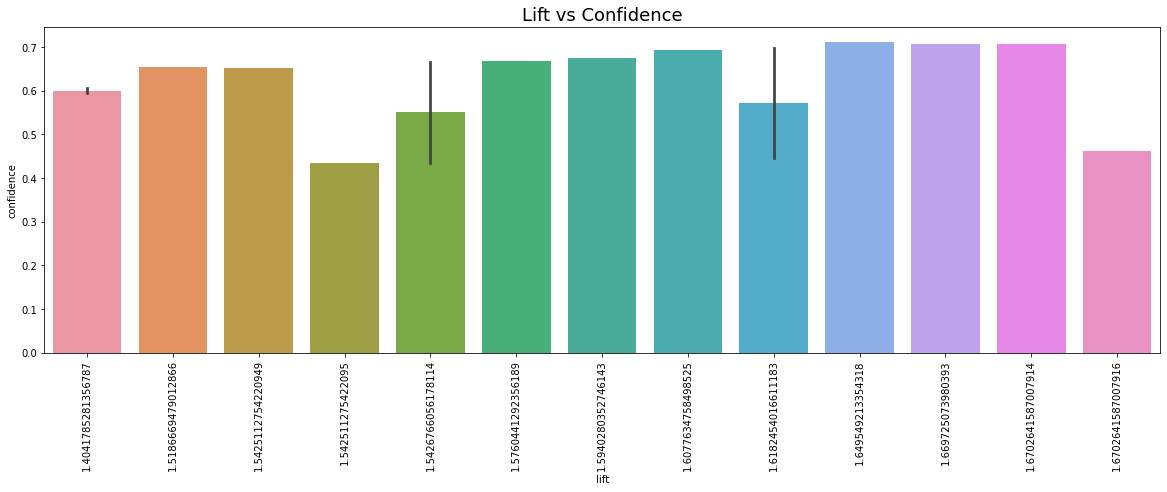

In [81]:
plt.figure(figsize=(20,6))
sns.barplot("lift","confidence",data=lift)
plt.title("Lift vs Confidence", fontsize=18)
plt.xticks(rotation=90)
plt.show()

Lift vs Support

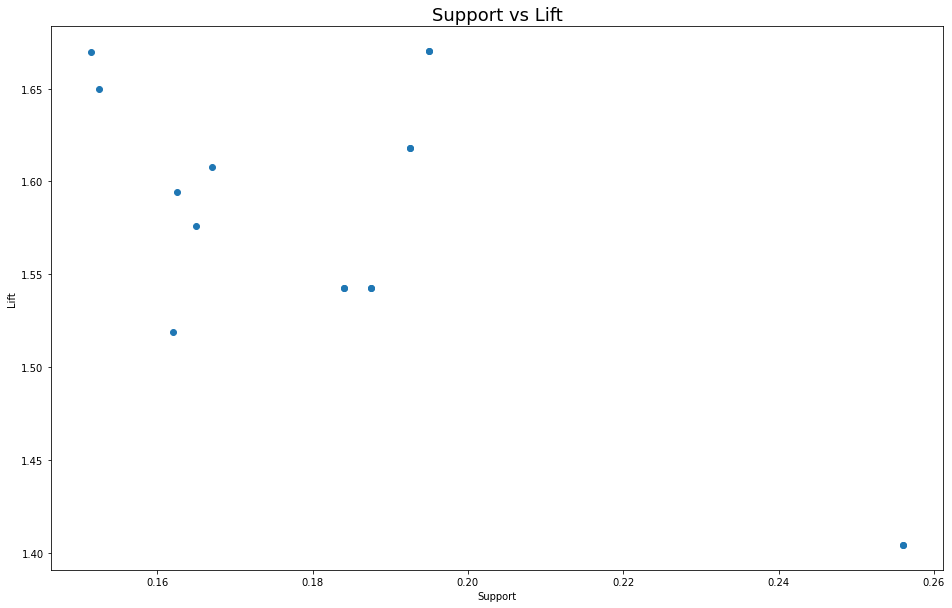

In [82]:
plt.figure(figsize=(16,10))
plt.scatter(rules['support'],rules['lift'])
plt.xlabel('Support')
plt.ylabel('Lift') 
plt.title('Support vs Lift', fontsize=18)
plt.show()

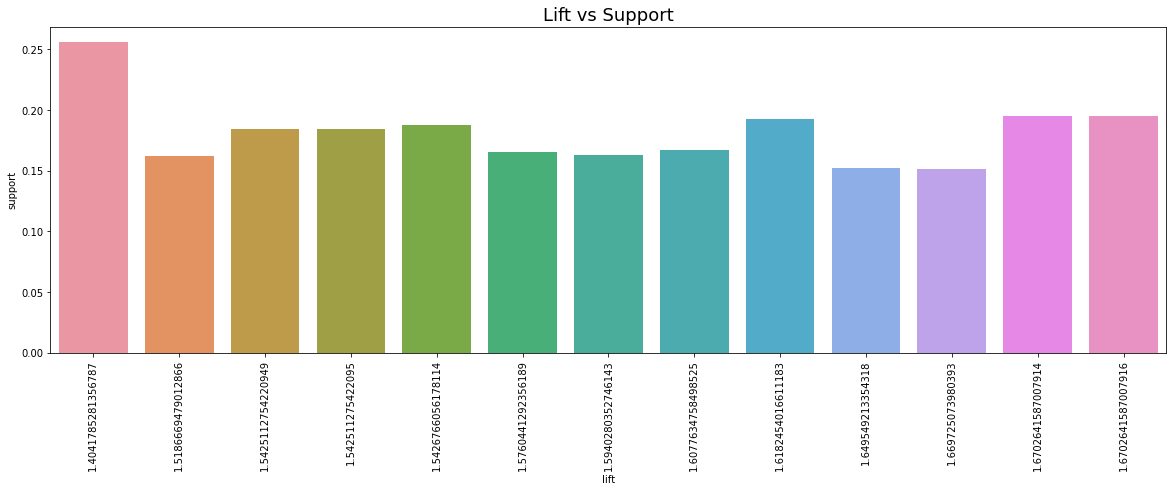

In [83]:
plt.figure(figsize=(20,6))
sns.barplot("lift","support",data=lift)
plt.title("Lift vs Support", fontsize=18)
plt.xticks(rotation=90)
plt.show()

**Apriori Algorithm for 20% Support and 60% confidence**

In [84]:
data = raw_data.copy()
items = apriori(data,min_support=0.2,use_colnames=True)
items['length'] = items['itemsets'].apply(lambda x: len(x))
items

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.2560,"(CookBks, ChildBks)",2


In [85]:
rules = association_rules(items,metric='confidence',min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.44124


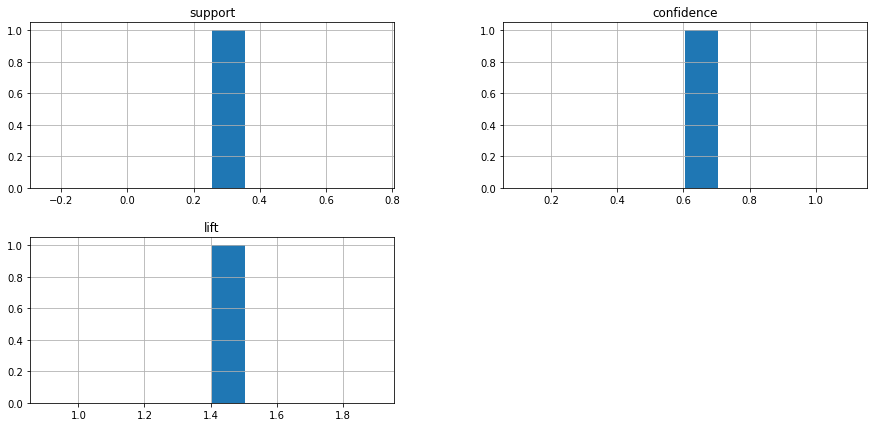

In [86]:
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

In [87]:
# Lift Ratio > 1 is a good influential rule
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.44124


Support vs Confidence

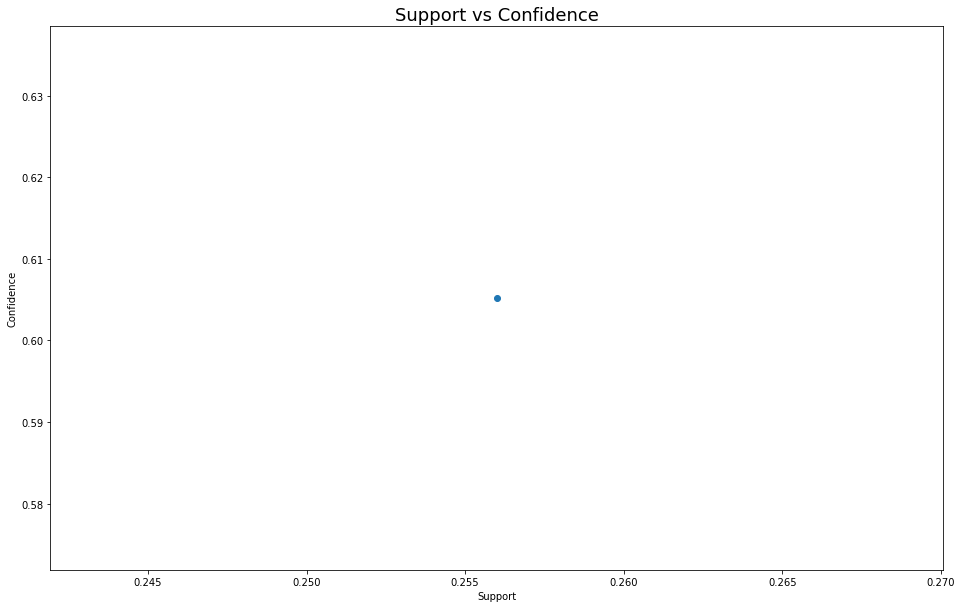

In [88]:
plt.figure(figsize=(16,10))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence') 
plt.title('Support vs Confidence', fontsize=18)
plt.show()

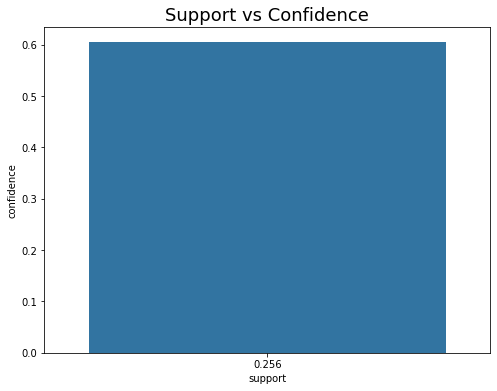

In [89]:
plt.figure(figsize=(8,6))
sns.barplot("support","confidence",data=lift)
plt.title("Support vs Confidence", fontsize=18)
plt.show()

Lift vs Confidence

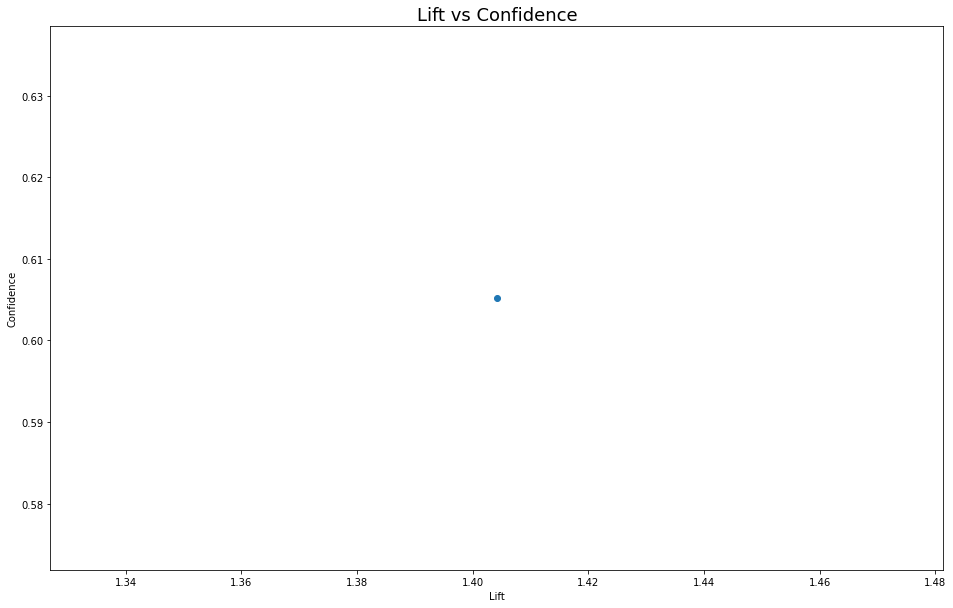

In [90]:
plt.figure(figsize=(16,10))
plt.scatter(rules['lift'],rules['confidence'])
plt.xlabel('Lift')
plt.ylabel('Confidence') 
plt.title('Lift vs Confidence', fontsize=18)
plt.show()

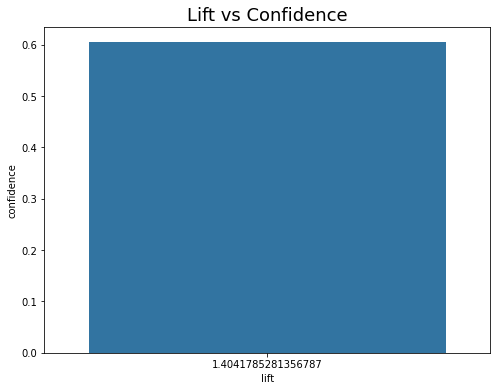

In [91]:
plt.figure(figsize=(8,6))
sns.barplot("lift","confidence",data=lift)
plt.title("Lift vs Confidence", fontsize=18)
plt.show()

Support vs Lift

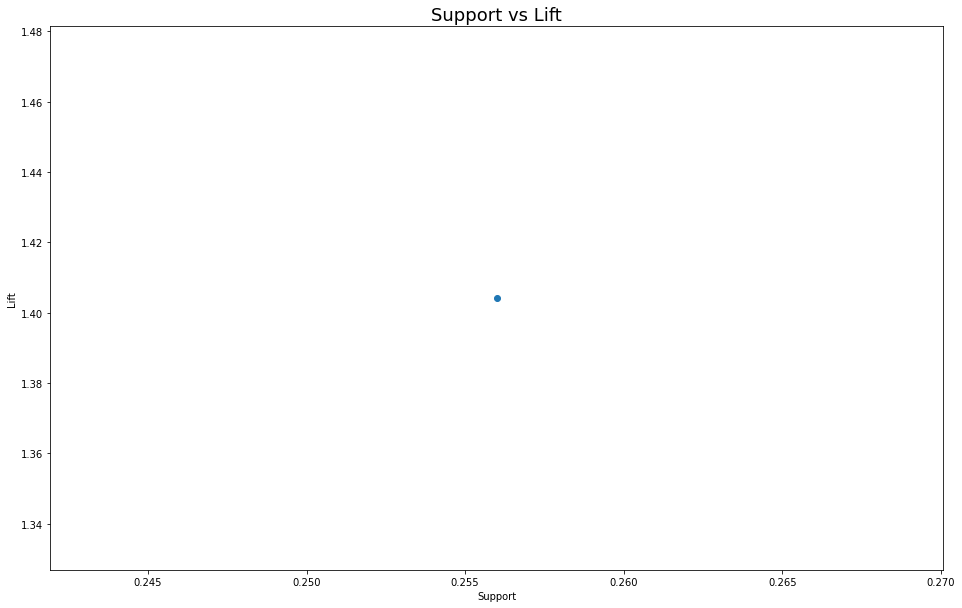

In [92]:
plt.figure(figsize=(16,10))
plt.scatter(rules['support'],rules['lift'])
plt.xlabel('Support')
plt.ylabel('Lift') 
plt.title('Support vs Lift', fontsize=18)
plt.show()

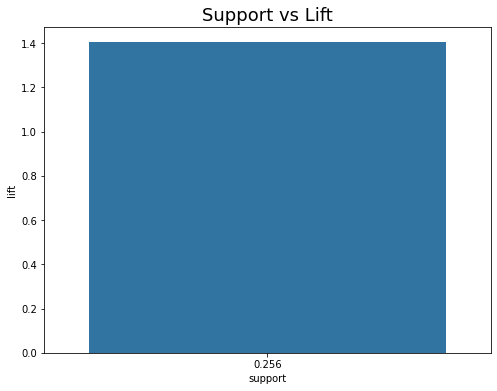

In [93]:
plt.figure(figsize=(8,6))
sns.barplot("support","lift",data=lift)
plt.title("Support vs Lift", fontsize=18)
plt.show()